In [1]:
# 
import os

os.chdir("../")
os.getcwd()

'c:\\Users\\HP\\Desktop\\flight-comptetion\\NNights-team'

-- Enrich start ------------- 
add_day_of_year  ...
add_distance_to_next_holiday  ...
add_distance_to_previous_holiday  ...
special_loc_encoding  ...
-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks', 'day_of_year', 'distance_to_next_holiday', 'distance_to_previous_holiday', 'ATL', 'BOS', 'CLT', 'DEN', 'DFW', 'DTW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'LGA', 'MCO', 'MIA', 'MSP', 'ORD', 'PHL', 'PHX', 'SEA', 'SFO']
> cv results : 
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         7.473315        0.001597        7.473448       0.020091
1         5.271191        0.001393        5.272197       0.019950
2         3.740035        0.001037        3.743168       0.017188
3         2.681529        0.002038        2.687121       0.014539
4         1.958662        0.002079        1.967298       0.015574
5         1.473930        0.002225        1.488089       0.015422
6         1.157061        0.003859        1.177773       0.013099
7         0.956650    

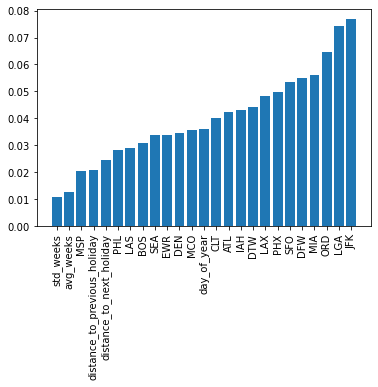

In [2]:
# test
import pandas as pd
from nnights.experiment import Experiment


data_train = pd.read_csv('data/flights_train.csv')
# init exp
exp = Experiment(name='special_encoding', data=data_train)

config = {'enrich': ['add_day_of_year', 'add_distance_to_next_holiday', 'add_distance_to_previous_holiday', 'special_loc_encoding'],
          'model': {'model_params': {'objective': 'reg:squarederror'},
                    'train_params': {'use_cv': True}},
          'x_columns': ['avg_weeks', 'std_weeks']}

# run exp
exp.run(config)
# or if enriched run instead exp.run(config,use_cache=True)


# store exp data
X_data = pd.read_csv("data/flights_Xtest.csv")

In [3]:
exp.freeze(
    path="submissions", 
    X_data=X_data,
    with_sub=True
)

Successfully created the directory submissions/special_encoding 
add_day_of_year  ...
add_distance_to_next_holiday  ...
add_distance_to_previous_holiday  ...
special_loc_encoding  ...
[11.5729265 10.930938  11.450352  11.567583  11.285209 ]
generate submission  submissions/special_encoding/submission.csv
